# # Netflix Data Analysis


1. Import Libraries
We begin by importing the necessary libraries for data manipulation (`pandas`, `numpy`) and visualization (`matplotlib`, `seaborn`).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import boxplot
from pandas.core.algorithms import duplicated

2. Load Data

In [3]:
df = pd.read_csv('netflix1.csv')

3. Display the first few rows of the DataFrame to understand its structure.

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


4. Drop Unnecessary Columns

In [5]:
df_wanted = df.drop(columns="director")
print(df_wanted.head())

  show_id     type                             title        country  \
0      s1    Movie              Dick Johnson Is Dead  United States   
1      s3  TV Show                         Ganglands         France   
2      s6  TV Show                     Midnight Mass  United States   
3     s14    Movie  Confessions of an Invisible Girl         Brazil   
4      s8    Movie                           Sankofa  United States   

  date_added  release_year rating  duration  \
0  9/25/2021          2020  PG-13    90 min   
1  9/24/2021          2021  TV-MA  1 Season   
2  9/24/2021          2021  TV-MA  1 Season   
3  9/22/2021          2021  TV-PG    91 min   
4  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Ind

Inspect the dimensions of the dataset and the data types of each column.

In [6]:
print(df_wanted.shape)
print(df_wanted.dtypes)

(8790, 9)
show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


- Check for duplicate rows.
- Drop rows with missing values.
- Convert the `date_added` column to datetime objects for time-series analysis

In [37]:
df_wanted.loc[df_wanted.duplicated()]
df_wanted.dropna()

df_wanted['date_added'] = pd.to_datetime(df_wanted['date_added'])


Separate the dataset into two DataFrames: one for **Movies** and one for **TV Shows**.

In [8]:
movies = df_wanted.query("`type` == 'Movie'").copy()



In [9]:
tv_shows = df_wanted.query("`type` == 'TV Show'").copy()


Visualize the count of Movies vs. TV Shows in the dataset.

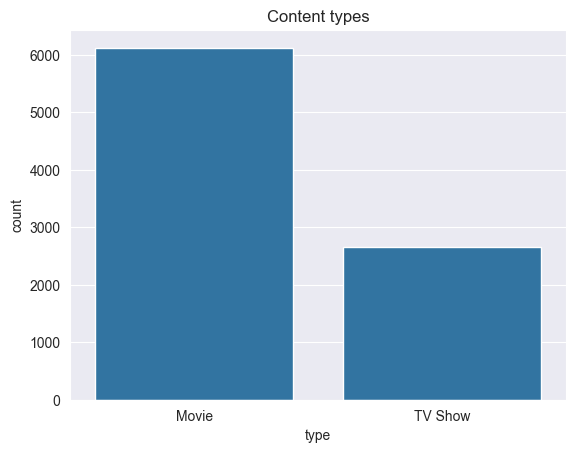

In [10]:
sns.countplot(data=df_wanted, x='type')
plt.title('Content types')
plt.show()

Visualize the top 10 countries producing Movies.

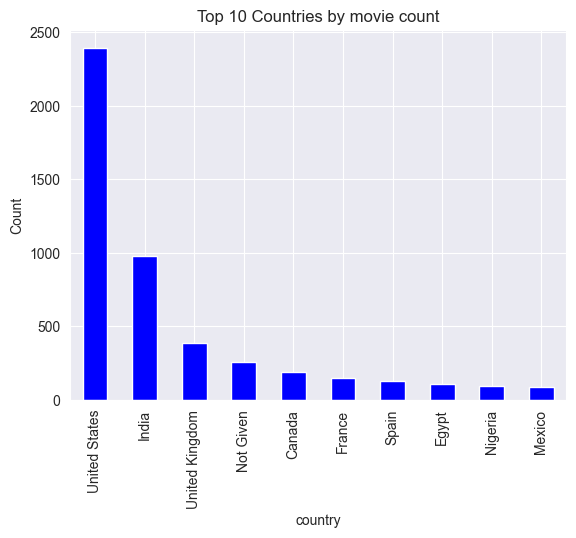

In [11]:
movies['country'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Countries by movie count')
plt.ylabel('Count')
plt.show()

Visualize the top 10 countries producing TV Shows.

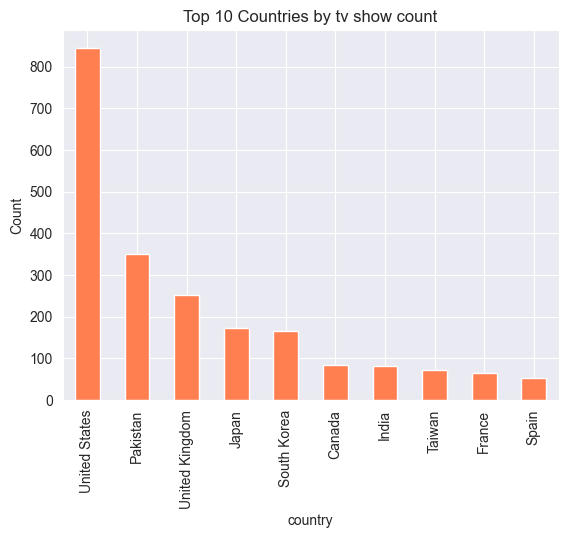

In [12]:
tv_shows['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by tv show count')
plt.ylabel('Count')
plt.show()

Extract the year from `date_added` and visualize the trend of content addition over the years.

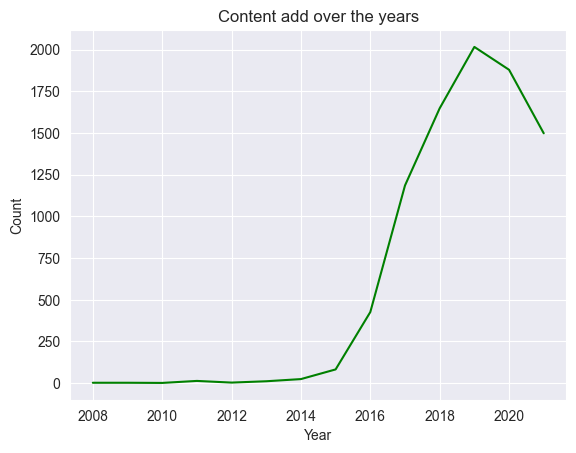

In [13]:
df_wanted['year_added'] = df_wanted['date_added'].dt.year
df_wanted['year_added'].value_counts().sort_index().plot(kind='line', color='green')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Content add over the years')
plt.grid(True)
plt.show()


A pie chart representation of the ratio between Movies and TV Shows.

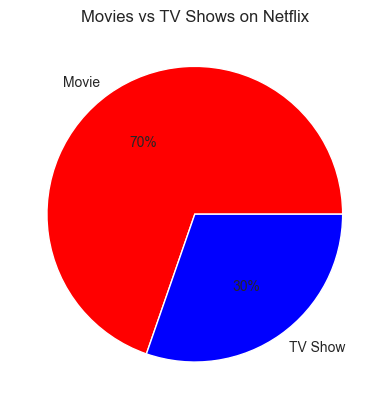

In [14]:
colors = ['red', 'blue']
type_counts = df_wanted['type'].value_counts()
labels = type_counts.index

plt.pie(type_counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Movies vs TV Shows on Netflix')
plt.show()

The `listed_in` column contains comma-separated values. We split these strings and "explode" the DataFrame so that each genre gets its own row.

In [15]:
movies.explode('listed_in')

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"
8707,s8269,Movie,The Darkest Dawn,United Kingdom,2018-06-23,2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern..."
8716,s8331,Movie,The Great Battle,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies"
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies"


In [16]:
movies['listed_in'] = movies['listed_in'].str.split(', ')

movies_exploded = movies.explode('listed_in')


In [17]:
tv_shows['listed_in'] = tv_shows['listed_in'].str.split(', ')
tv_shows_exploded = tv_shows.explode('listed_in')
print(tv_shows_exploded.head())

  show_id     type          title        country date_added  release_year  \
1      s3  TV Show      Ganglands         France 2021-09-24          2021   
1      s3  TV Show      Ganglands         France 2021-09-24          2021   
1      s3  TV Show      Ganglands         France 2021-09-24          2021   
2      s6  TV Show  Midnight Mass  United States 2021-09-24          2021   
2      s6  TV Show  Midnight Mass  United States 2021-09-24          2021   

  rating  duration               listed_in  
1  TV-MA  1 Season          Crime TV Shows  
1  TV-MA  1 Season  International TV Shows  
1  TV-MA  1 Season   TV Action & Adventure  
2  TV-MA  1 Season               TV Dramas  
2  TV-MA  1 Season               TV Horror  


Plot the frequency of different genres for Movies.

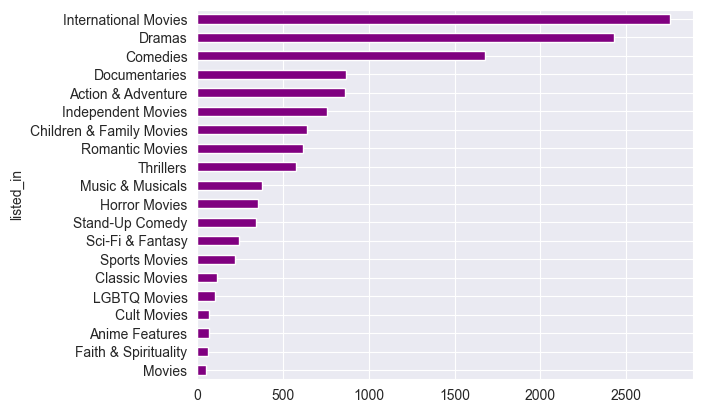

In [18]:
movies_exploded['listed_in'].value_counts().plot(kind='barh', color='purple')
plt.gca().invert_yaxis()
plt.show()

Plot the frequency of different genres for TV Shows.

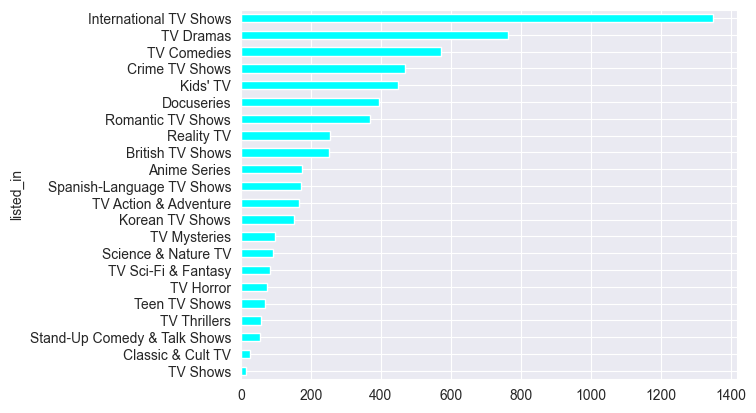

In [19]:
tv_shows_exploded['listed_in'].value_counts().plot(kind='barh', color='cyan')
plt.gca().invert_yaxis()
plt.show()

Visualize the distribution of content ratings (e.g., PG-13, TV-MA) for Movies.

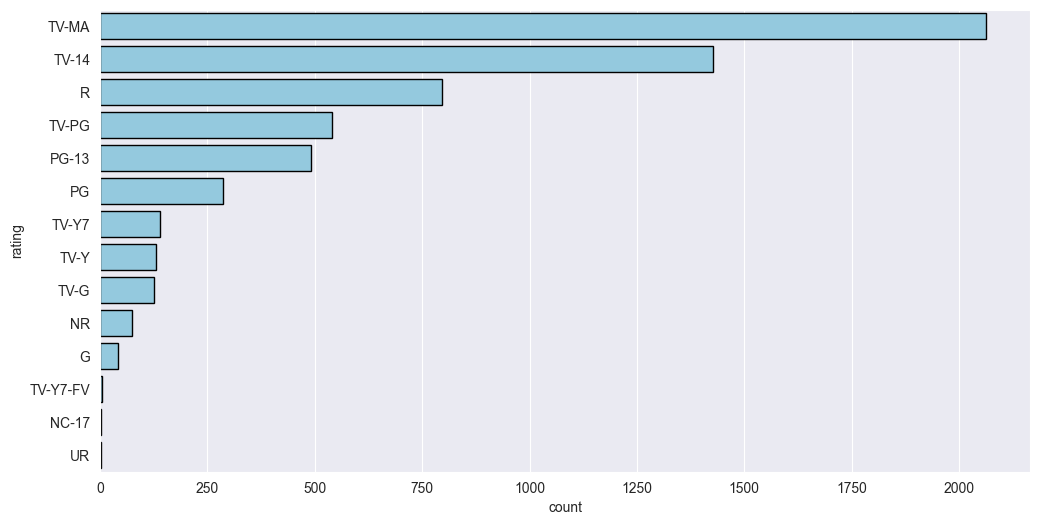

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y=movies["rating"],order=movies["rating"].value_counts().index,edgecolor='black',color='skyblue')

plt.show()

Analyze the relationship between when content was released versus when it was added to Netflix.

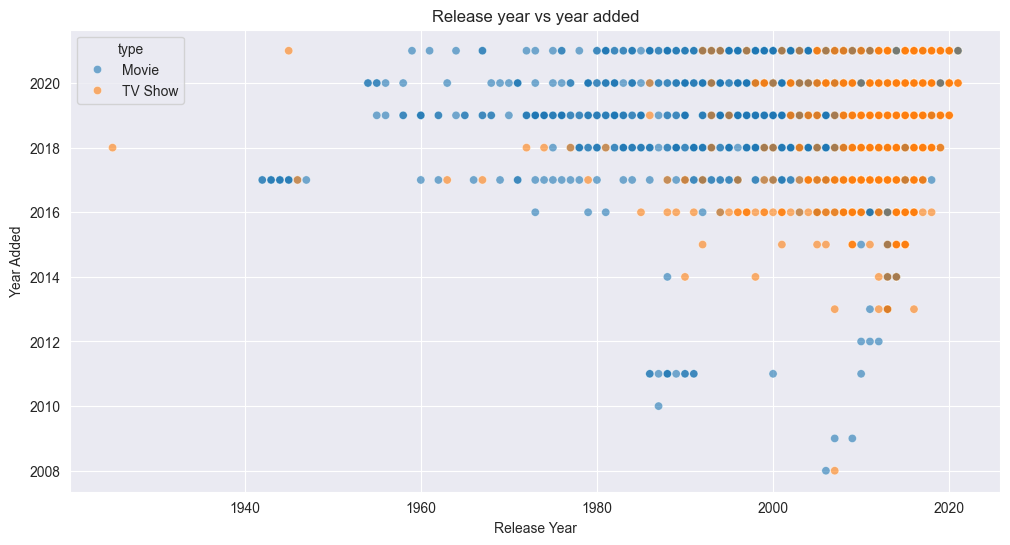

In [31]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df,x='release_year',y='year_added',hue='type',alpha=0.6)

plt.title('Release year vs year added')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()

Create a heatmap to visualize the relationship between the top 5 countries and the top 5 movie genres.
1. Filter out unknown countries.
2. Identify top 5 countries and genres.
3. Create a matrix and plot the heatmap.

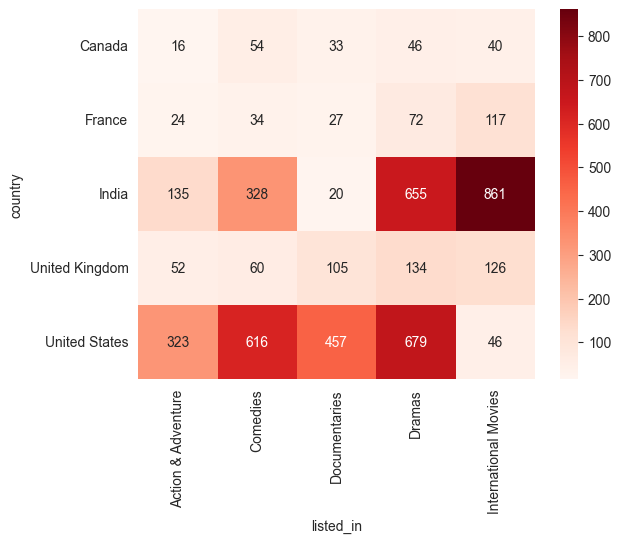

In [51]:
movies_exploded2 = movies_exploded.query("country != 'Not Given'")

countr1 = movies_exploded2['country'].value_counts().head(5).index
cat = movies_exploded2['listed_in'].value_counts().head(5).index

heatmap_ready = movies_exploded2[
movies_exploded2['listed_in'].isin(cat) &
movies_exploded2['country'].isin(countr1)
]
heatmap_matrix = pd.crosstab(heatmap_ready['country'], heatmap_ready['listed_in'])

sns.heatmap(data=heatmap_matrix, annot=True, fmt='g', cmap='Reds')
plt.show()
